In [1]:
import numpy as np
import pandas as pd
import datetime
import sklearn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('prismc-tmax-daily-40_-120.csv')

In [3]:
data.index

RangeIndex(start=0, stop=15092, step=1)

In [4]:
data.head()

,date,value
0,1981-01-01,55.08 deg_F
1,1981-01-02,51.48 deg_F
2,1981-01-03,51.87 deg_F
3,1981-01-04,45.09 deg_F
4,1981-01-05,48.72 deg_F


In [5]:
data['value'] = data['value'].apply(lambda x: x.rstrip(" deg_F"))
data.head()

,date,value
0,1981-01-01,55.08
1,1981-01-02,51.48
2,1981-01-03,51.87
3,1981-01-04,45.09
4,1981-01-05,48.72


In [6]:
data = data.rename(columns = {'date' : 'Date', 'value' : "Max_Deg_F"})
data.head()

,Date,Max_Deg_F
0,1981-01-01,55.08
1,1981-01-02,51.48
2,1981-01-03,51.87
3,1981-01-04,45.09
4,1981-01-05,48.72


In [7]:
data.Max_Deg_F = data.Max_Deg_F.astype(float)
data.head()

,Date,Max_Deg_F
0,1981-01-01,55.08
1,1981-01-02,51.48
2,1981-01-03,51.87
3,1981-01-04,45.09
4,1981-01-05,48.72


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15092 non-null  object 
 1   Max_Deg_F  15092 non-null  float64
dtypes: float64(1), object(1)
memory usage: 235.9+ KB


In [9]:
data.Date = data.Date.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15092 non-null  datetime64[ns]
 1   Max_Deg_F  15092 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 235.9 KB


In [10]:
X = data.iloc[:, 0:1].values
y = data.iloc[:, 1].values

In [11]:
len(X) == len(y)

True

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

## Visualizing the Polynomial Regression

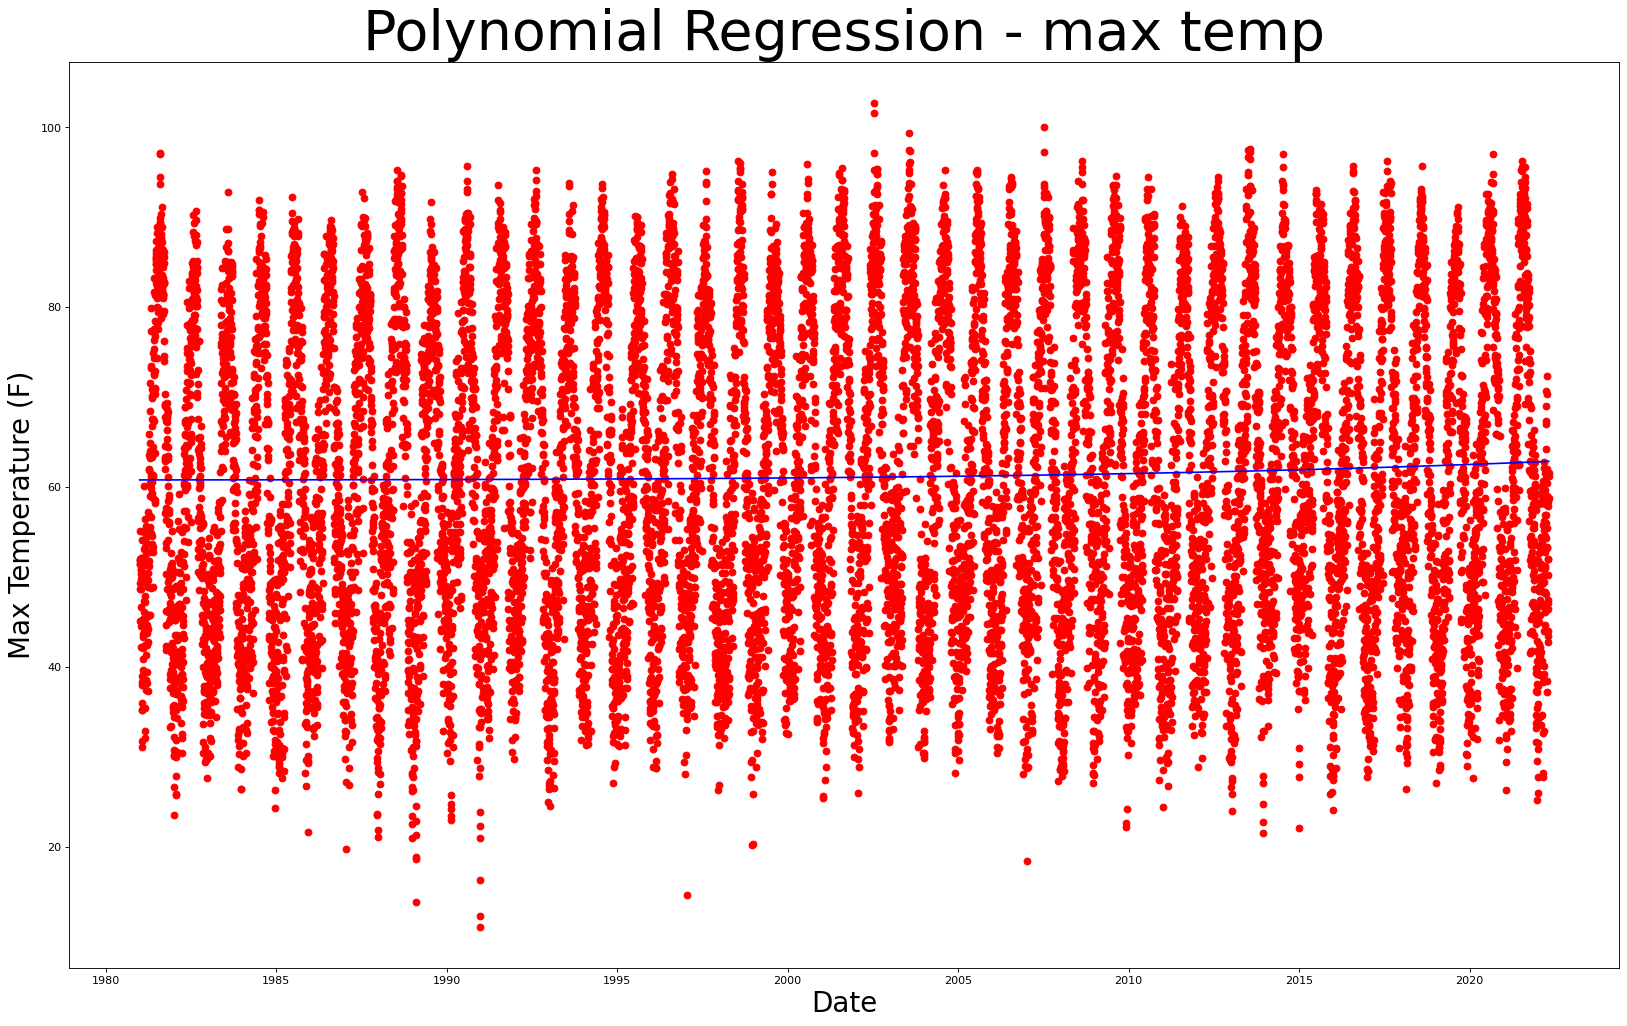

In [15]:
plt.figure(figsize=(25,15), dpi=80)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression - max temp', size = 50)
plt.xlabel('Date', size=25)
plt.ylabel('Max Temperature (F)', size = 25)
plt.savefig('poly_reg_max_temp.png')
plt.show()